In [1]:
import numpy as np 
import pandas as pd 
from sklearn import manifold, datasets
from matplotlib import pyplot as plt
import time 

In [2]:
def l2_value(x):
    return np.linalg.norm(x)


def perpare_data(vec_cnt, dim_cnt):
    l2_vec1 = []
    l2_vec2 = []
    vec_low = np.array([])
    vec_big = np.array([])
    vec_normal = np.array([])
    l2_val_list = []
    time_begin = time.time()
    while vec_low.shape[0] < vec_cnt or vec_big.shape[0] < vec_cnt or vec_normal.shape[0] < vec_cnt:
        vec = np.random.rand(dim_cnt) * 2 - 1
        l2_val = l2_value(vec)
        if l2_val > 5.8 and l2_val < 6 and vec_low.shape[0] < vec_cnt:
            if vec_low.shape[0] == 0:
                vec_low = np.array([vec])
            else:
                vec_low = np.append(vec_low, np.array([vec]), axis = 0)
            l2_vec1.append(l2_val)
        if l2_val > 7 and l2_val < 7.2 and vec_big.shape[0] < vec_cnt:
            if vec_big.shape[0] == 0:
                vec_big = np.array([vec])
            else:
                vec_big = np.append(vec_big, np.array([vec]), axis = 0)
            l2_vec2.append(l2_val)
        if vec_normal.shape[0] < vec_cnt:
            if vec_normal.shape[0] == 0:
                vec_normal = np.array([vec])
            else:
                vec_normal = np.append(vec_normal, np.array([vec]), axis = 0)
        l2_val_list.append(l2_val)
        # if np.random.rand() < 0.0001:
        #     print (vec_low.shape[0], vec_big.shape[0], vec_normal.shape[0], time.time() - time_begin, np.mean(l2_val_list), np.max(l2_val_list), np.min(l2_val_list))
    return vec_low, vec_big, vec_normal, len(l2_val_list)

In [3]:
def data_norm(X):
    tsne = manifold.TSNE(n_components = 2, init = 'pca', random_state = 1996)
    X_tsne = tsne.fit_transform(X)
    x_min, x_max = X_tsne.min(0), X_tsne.max(0)
    X_norm = (X_tsne - x_min) / (x_max - x_min)  # 归一化
    return X_norm

In [4]:
def t_sne(X):
    X_norm = data_norm(X)
    plt.figure(figsize=(8, 8))
    plt.scatter(X_norm[:, 0], X_norm[:, 1], s = 10)
    plt.show()

In [5]:
vec_cnt = 3000
dim_cnt = 128
vec_low, vec_big, vec_normal, random_cnt = perpare_data(vec_cnt, dim_cnt)
print (random_cnt)

155309


# 1、结论：一定模长内均匀采样，降维后分布也均匀

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


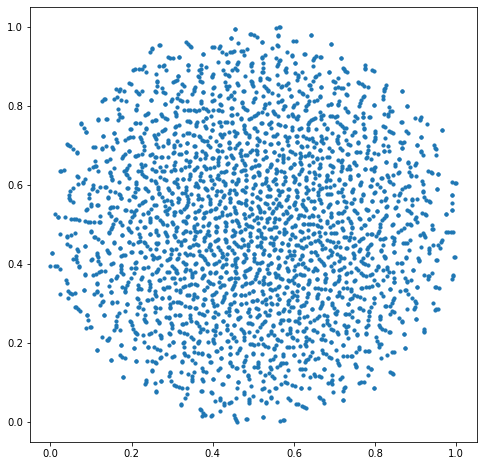

In [6]:
# 结论：一定模长内均匀采样，降维后分布也均匀
t_sne(vec_low)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


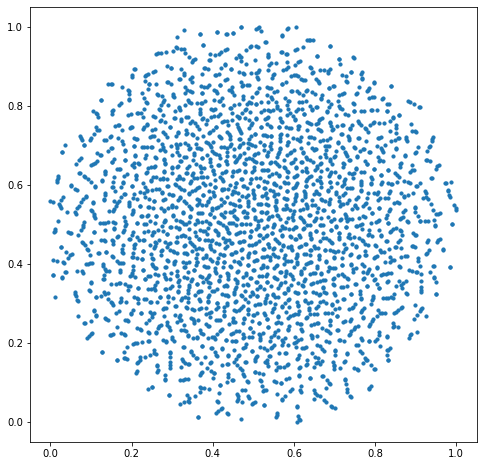

In [7]:
# 结论：一定模长内均匀采样，降维后分布也均匀
t_sne(vec_big)

# 2、结论：两个不同模长的球面一起降维，降维后无法线性区分，模长短的集中在中间，长的集中在外围

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


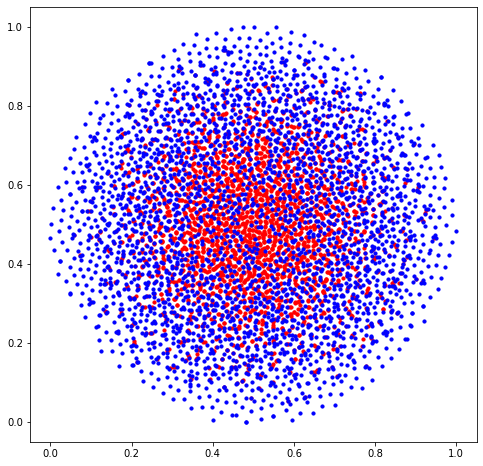

In [8]:
vec_concat = np.concatenate([vec_low, vec_big], axis = 0)
X = data_norm(vec_concat)
plt.figure(figsize=(8, 8))
plt.scatter(X[: 3000, 0], X[: 3000, 1], c = 'r', s = 10)
plt.scatter(X[3000: , 0], X[3000: , 1], c = 'b', s = 10)
plt.show()

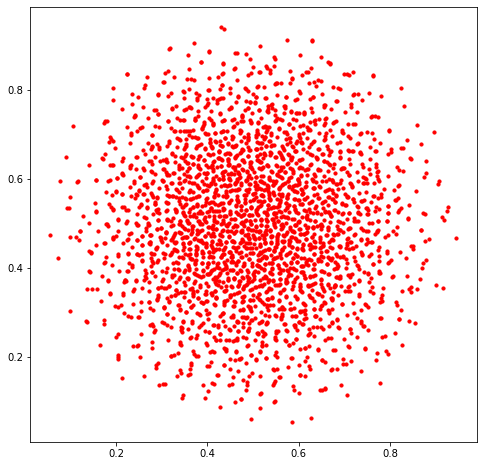

In [9]:
# 短的
plt.figure(figsize=(8, 8))
plt.scatter(X[: 3000, 0], X[: 3000, 1], c = 'r', s = 10)
# plt.scatter(X[3000: , 0], X[3000: , 1], c = 'b', s = 10)
plt.show()

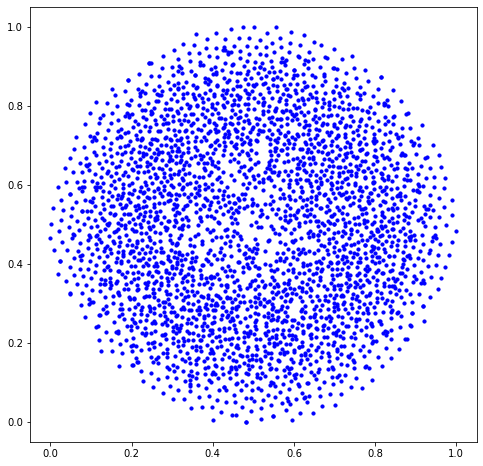

In [10]:
# 长的
plt.figure(figsize=(8, 8))
# plt.scatter(X[: 3000, 0], X[: 3000, 1], c = 'r', s = 10)
plt.scatter(X[3000: , 0], X[3000: , 1], c = 'b', s = 10)
plt.show()

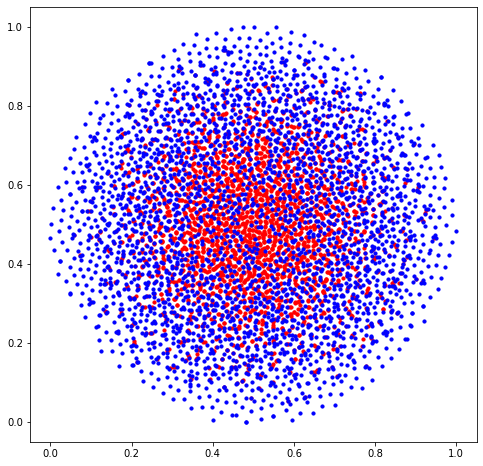

In [11]:
plt.figure(figsize=(8, 8))
plt.scatter(X[: 3000, 0], X[: 3000, 1], c = 'r', s = 10)
plt.scatter(X[3000: 6000, 0], X[3000: 6000, 1], c = 'b', s = 10)
plt.scatter(X[6000: , 0], X[6000: , 1], c = 'y', s = 10)
plt.show()

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


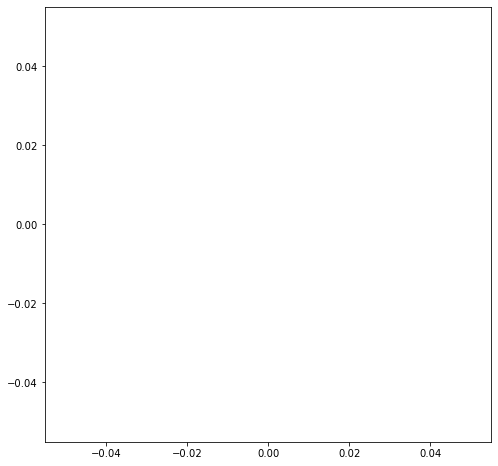

In [12]:
X = data_norm(vec_concat)
plt.figure(figsize=(8, 8))
# plt.scatter(X[: 3000, 0], X[: 3000, 1], c = 'r', s = 10)
# plt.scatter(X[3000: 6000, 0], X[3000: 6000, 1], c = 'b', s = 10)
plt.scatter(X[6000: , 0], X[6000: , 1], c = 'y', s = 10)
plt.show()

## 2.2、加不加 normal 一起降维，可视化的点不同，但都能区分开

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


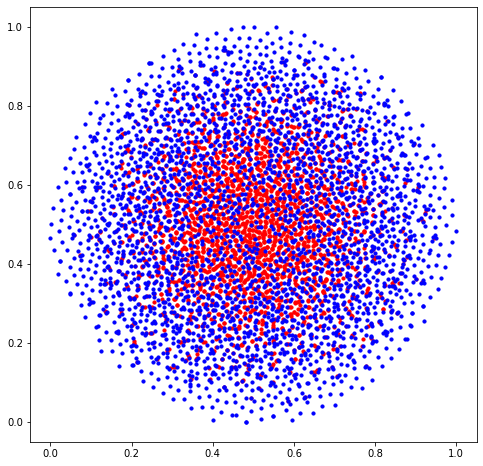

In [13]:
# 不添加 normal 对比验证
vec_concat = np.concatenate([vec_low, vec_big], axis = 0)
X = data_norm(vec_concat)
plt.figure(figsize=(8, 8))
plt.scatter(X[: 3000, 0], X[: 3000, 1], c = 'r', s = 10)
plt.scatter(X[3000: 6000, 0], X[3000: 6000, 1], c = 'b', s = 10)
plt.show()

## 2.3、如果normal 放的更多，不影响结果，放的过多会出错

In [14]:
def perpare_data(vec_cnt, dim_cnt, normal_times = 1):
    l2_vec1 = []
    l2_vec2 = []
    vec_low = np.array([])
    vec_big = np.array([])
    vec_normal = np.array([])
    l2_val_list = []
    time_begin = time.time()
    while vec_low.shape[0] < vec_cnt or vec_big.shape[0] < vec_cnt or vec_normal.shape[0] < vec_cnt * normal_times:
        vec = np.random.rand(dim_cnt)
        l2_val = l2_value(vec)
        if l2_val > 5.8 and l2_val < 6 and vec_low.shape[0] < vec_cnt:
            if vec_low.shape[0] == 0:
                vec_low = np.array([vec])
            else:
                vec_low = np.append(vec_low, np.array([vec]), axis = 0)
            l2_vec1.append(l2_val)
        if l2_val > 7 and l2_val < 7.2 and vec_big.shape[0] < vec_cnt:
            if vec_big.shape[0] == 0:
                vec_big = np.array([vec])
            else:
                vec_big = np.append(vec_big, np.array([vec]), axis = 0)
            l2_vec2.append(l2_val)
        if vec_normal.shape[0] < vec_cnt * normal_times:
            if vec_normal.shape[0] == 0:
                vec_normal = np.array([vec])
            else:
                vec_normal = np.append(vec_normal, np.array([vec]), axis = 0)
        l2_val_list.append(l2_val)
        # if np.random.rand() < 0.0001:
        #     print (vec_low.shape[0], vec_big.shape[0], vec_normal.shape[0], time.time() - time_begin, np.mean(l2_val_list), np.max(l2_val_list), np.min(l2_val_list))
    return vec_low, vec_big, vec_normal, len(l2_val_list)

In [15]:
def show_by_normal_times(normal_times):
    vec_cnt = 3000
    dim_cnt = 128
    vec_low, vec_big, vec_normal, random_cnt = perpare_data(vec_cnt, dim_cnt, normal_times)
    vec_concat = np.concatenate([vec_low, vec_big, vec_normal], axis = 0)
    X = data_norm(vec_concat)
    print ("X.shape: ", X.shape)

    # 大、小
    plt.figure(figsize=(8, 8))
    plt.scatter(X[: 3000, 0], X[: 3000, 1], c = 'r', s = 10)
    plt.scatter(X[3000: 6000, 0], X[3000: 6000, 1], c = 'b', s = 10)
    # plt.scatter(X[6000: , 0], X[6000: , 1], c = 'y', s = 10)
    plt.title('low and big')
    plt.show()

    # normal
    plt.figure(figsize=(8, 8))
    # plt.scatter(X[: 3000, 0], X[: 3000, 1], c = 'r', s = 10)
    # plt.scatter(X[3000: 6000, 0], X[3000: 6000, 1], c = 'b', s = 10)
    plt.scatter(X[6000: , 0], X[6000: , 1], c = 'y', s = 10)
    plt.title('normal')
    plt.show()

    # 汇总 
    plt.figure(figsize=(8, 8))
    plt.scatter(X[: 3000, 0], X[: 3000, 1], c = 'r', s = 10)
    plt.scatter(X[3000: 6000, 0], X[3000: 6000, 1], c = 'b', s = 10)
    plt.scatter(X[6000: , 0], X[6000: , 1], c = 'y', s = 10)
    plt.title('all')
    plt.show()

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


X.shape:  (15000, 2)


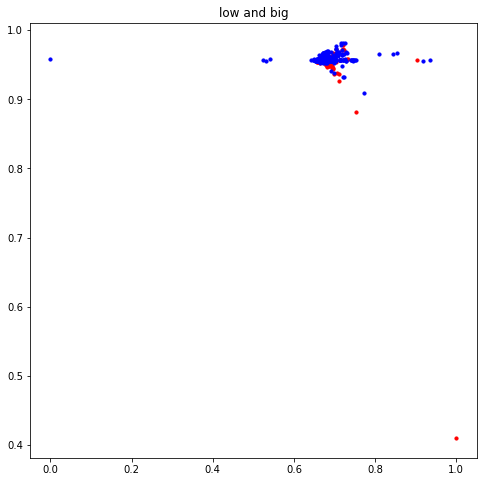

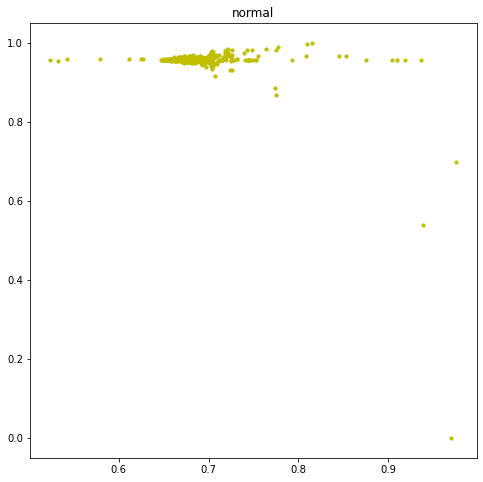

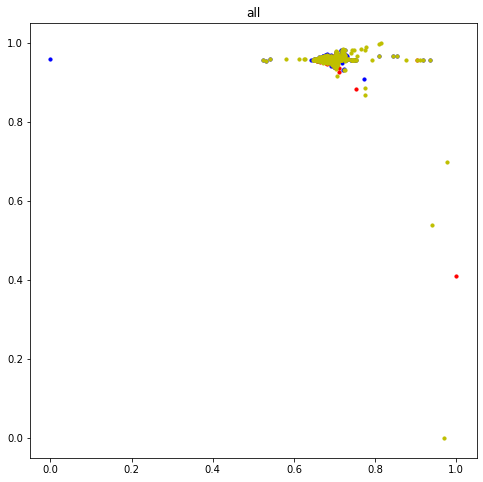

In [16]:
# 3倍的话，看起来还正常
normal_times = 3
show_by_normal_times(normal_times)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


X.shape:  (21000, 2)


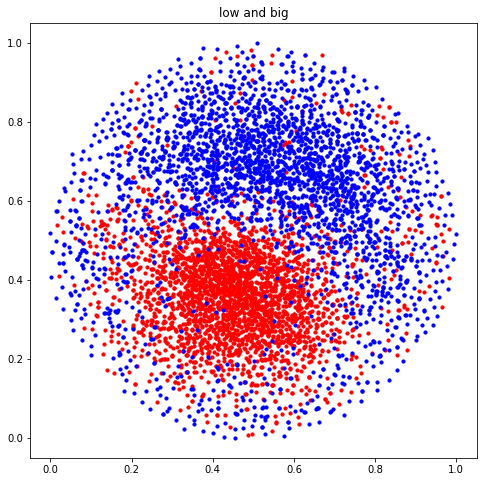

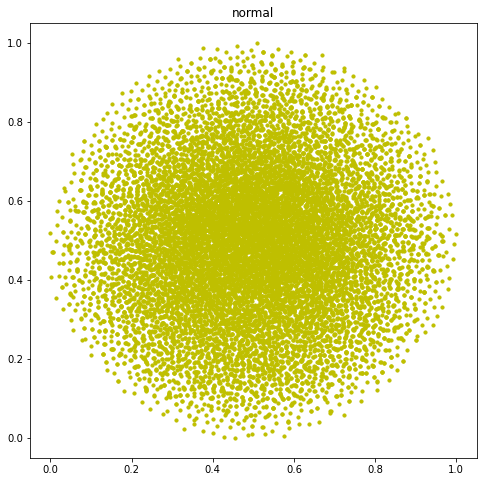

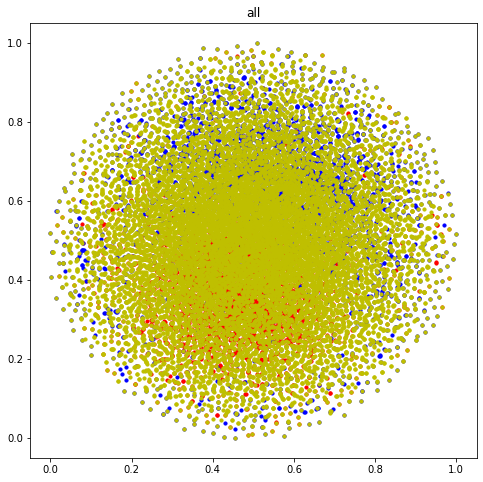

In [17]:
# 5 倍结果已经完蛋了
normal_times = 5
show_by_normal_times(normal_times)

# 3、验证各向异性的降维，可行，正负两侧会分别聚集成两个球形，而且是斜率 45度 拉长。

In [18]:
def perpare_data(vec_cnt, dim_cnt):
    l2_vec1 = []
    l2_vec2 = []
    vec_pos = np.array([])
    vec_neg = np.array([])
    l2_val_list = []
    time_begin = time.time()
    while vec_pos.shape[0] < vec_cnt or vec_neg.shape[0] < vec_cnt:
        vec = np.random.rand(dim_cnt) * 2 - 1
        l2_val = l2_value(vec)
        if l2_val > 6.4 and l2_val < 6.6:
            if vec_pos.shape[0] < vec_cnt:
                if vec_pos.shape[0] == 0:
                    vec_pos = np.abs(np.array([vec]))
                else:
                    vec_pos = np.append(vec_pos, np.abs(np.array([vec])), axis = 0)
            elif vec_neg.shape[0] < vec_cnt:
                if vec_neg.shape[0] == 0:
                    vec_neg = np.abs(np.array([vec])) * -1
                else:
                    vec_neg = np.append(vec_neg, np.abs(np.array([vec])) * -1, axis = 0)
            l2_vec1.append(l2_val)
        l2_val_list.append(l2_val)
        # if np.random.rand() < 0.0001:
        #     print (vec_pos.shape[0], vec_neg.shape[0], time.time() - time_begin, np.mean(l2_val_list), np.max(l2_val_list), np.min(l2_val_list))
    return vec_pos, vec_big, len(l2_val_list)

In [19]:
vec_cnt = 3000
dim_cnt = 128
vec_pos, vec_neg, random_cnt = perpare_data(vec_cnt, dim_cnt)
vec_concat = np.concatenate([vec_pos, vec_neg], axis = 0)
X = data_norm(vec_concat)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


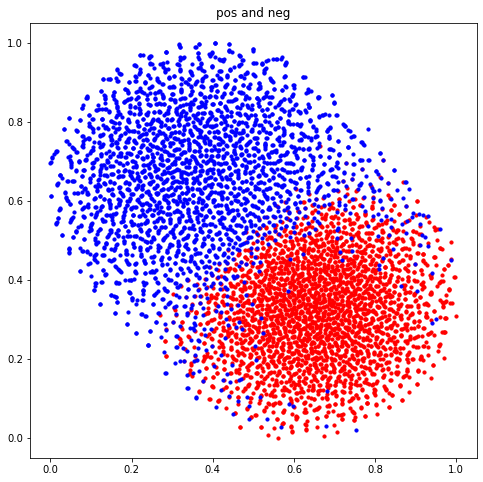

In [20]:
plt.figure(figsize=(8, 8))
plt.scatter(X[: 3000, 0], X[: 3000, 1], c = 'r', s = 10)
plt.scatter(X[3000: 6000, 0], X[3000: 6000, 1], c = 'b', s = 10)
plt.title('pos and neg')
plt.show()